# Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import signal
from scipy import interpolate

# Function Definitions

In [2]:
def depth_bin(df,depth,attr,depth_inc,win):
    min_depth = df[depth].min()
    max_depth = df[depth].max()
    n_inc = (max_depth-min_depth)//depth_inc
    print(min_depth, max_depth, n_inc)

    bin_mean = []
    bin_median = []
    bin_max = []
    bin_center = []
    bin_center_empty = []

    for i in np.arange(n_inc):
        min_temp = min_depth+((i)*depth_inc)
        max_temp = min_temp + depth_inc
        df_temp = df[(df[depth]>min_temp) & (df[depth]<=max_temp)]
        bin_center = np.append(bin_center,max_temp - depth_inc/2)
        if df_temp.size==0:
            bin_center_empty = np.append(bin_center_empty,max_temp - depth_inc/2)
            bin_mean = np.append(bin_mean,np.nan)
            bin_max = np.append(bin_max,bin_max[int(i-1)])
            bin_median = np.append(bin_median,np.nan)
        else:
            bin_mean = np.append(bin_mean,np.nanmean(df_temp[attr]))
            bin_max = np.append(bin_max,np.nanmax(df_temp[attr]))
            bin_median = np.append(bin_median,np.nanmedian(df_temp[attr]))

    print(min_temp,max_temp)

    df_binned_data = pd.DataFrame({'bin_center':bin_center})
    df_binned_data[attr+'bin_max']=bin_max
    print(df_binned_data[attr+'bin_max'].isna().sum())
    # df_binned_data[attr+'bin_max_win'] = df_binned_data[attr+'bin_max'].dropna().rolling(win).mean().reindex(df_binned_data.index, method='pad')
    df_binned_data[attr+'bin_max_win'] = df_binned_data[attr+'bin_max'].rolling(win).median()
    # df_binned_data[attr+'bin_max'].fillna(df_binned_data[attr+'bin_max_win'])
    df_binned_data[attr+'bin_mean']=bin_mean
    df_binned_data[attr+'bin_mean_win'] = df_binned_data[attr+'bin_mean'].rolling(win).median()
    # df_binned_data[attr+'bin_mean'].fillna(df_binned_data[attr+'bin_mean_win'])
    df_binned_data[attr+'bin_max'].fillna(df_binned_data[attr+'bin_max_win'])
    df_binned_data[attr+'bin_diff'] = df_binned_data[attr+'bin_max']-df_binned_data[attr+'bin_mean']
    df_binned_data[attr+'bin_median']=bin_median

    print(df_binned_data[attr+'bin_max'].isna().sum())

    return df_binned_data

# Load Data

In [6]:
path = '/Users/prathikprasad/Desktop/DataRepo Hook Load/17.5inch/'
df_28_trip = pd.read_csv(path+'Aug 28th depth 2910-3258.csv')
df_25_trip = pd.read_csv(path+'Aug25-27 depth 1512-2910 .csv')
df_29_trip = pd.read_csv(path+'Aug 29-30 depth 3258-4697.csv')
df_31_trip = pd.read_csv(path+'Aug 31-Sept1 depth 4697-4941.csv')
df_2_trip = pd.read_csv(path+'Sept2 -3 depth 4941-5803.csv')
df_4_trip = pd.read_csv(path+'Sept4-7 depth 5803-6547.csv')
df_8_trip = pd.read_csv(path+'Sept8 depth 6547-6586.csv')






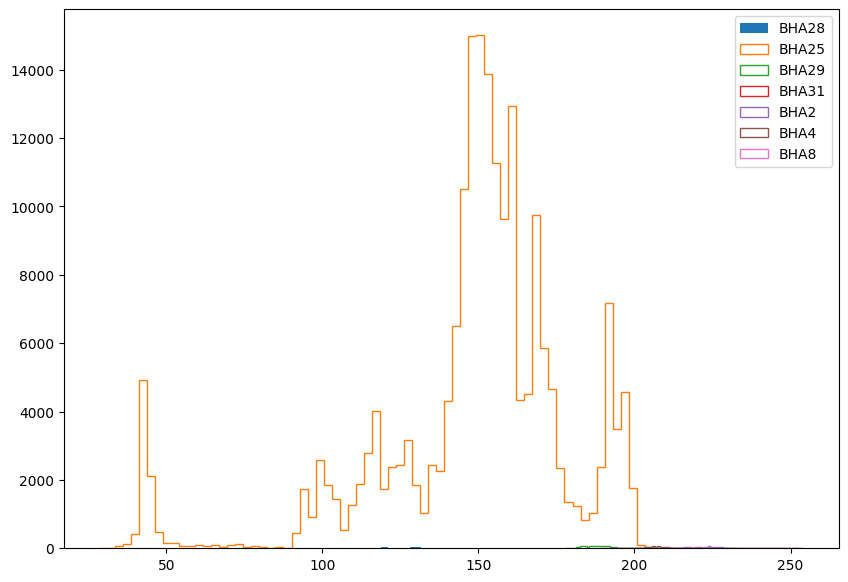

In [10]:

plt.hist(df_28_trip['Hook Load (klbs)'],75,histype = 'step' ,label='BHA28')
plt.hist(df_25_trip['Hook Load (klbs)'],75,histtype='step',label='BHA25')
plt.hist(df_29_trip['Hook Load (klbs)'],75,histtype='step',label='BHA29')
plt.hist(df_31_trip['Hook Load (klbs)'],75,histtype='step',label='BHA31')
plt.hist(df_2_trip['Hook Load (klbs)'],75,histtype='step',label='BHA2')
plt.hist(df_4_trip ['Hook Load (klbs)'],75,histtype='step',label='BHA4')
plt.hist(df_8_trip['Hook Load (klbs)'],75,histtype='step', label='BHA8')

plt.legend()

plt.gcf().set_size_inches(10,7)
plt.show()

## Filter

In [12]:
# df_BHA2_trip = df_BHA2_trip[df_BHA2_trip['Hook Load (klbs)']>100]
# df_BHA3_trip = df_BHA3_trip[df_BHA3_trip['Hook Load (klbs)']>100]
# df_BHA4_trip = df_BHA4_trip[df_BHA4_trip['Hook Load (klbs)']>100]
# df_BHA5_trip = df_BHA5_trip[df_BHA5_trip['Hook Load (klbs)']>100]
# df_BHA6_trip = df_BHA6_trip[df_BHA6_trip['Hook Load (klbs)']>100]
# df_BHA7_trip = df_BHA7_trip[df_BHA7_trip['Hook Load (klbs)']>100]
# df_BHA10_trip = df_BHA10_trip[df_BHA10_trip['Hook Load (klbs)']>100]



df_28_trip = df_28_trip[df_28_trip['Hook Load (klbs)']>100]
df_25_trip = df_25_trip[df_25_trip['Hook Load (klbs)']>100]
df_29_trip = df_29_trip[df_29_trip['Hook Load (klbs)']>100]
df_31_trip = df_31_trip[df_31_trip['Hook Load (klbs)']>100]
df_2_trip = df_2_trip[df_2_trip['Hook Load (klbs)']>100]
df_4_trip = df_4_trip[df_4_trip['Hook Load (klbs)']>100]
df_8_trip = df_8_trip[df_8_trip['Hook Load (klbs)']>100]

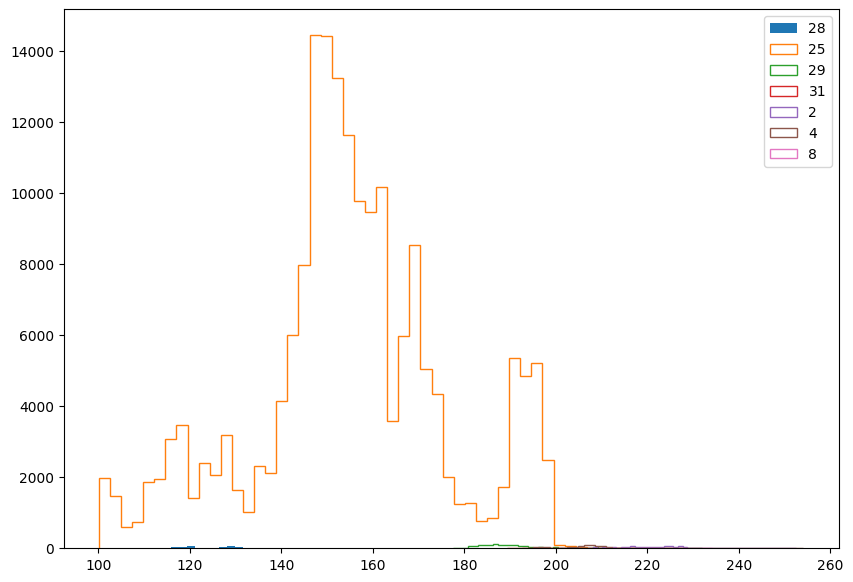

In [13]:
plt.hist(df_28_trip['Hook Load (klbs)'],50,label='28')
plt.hist(df_25_trip['Hook Load (klbs)'],50,histtype='step',label='25')
plt.hist(df_29_trip['Hook Load (klbs)'],50,histtype='step',label='29')
plt.hist(df_31_trip['Hook Load (klbs)'],50,histtype='step',label='31')
plt.hist(df_2_trip['Hook Load (klbs)'],50,histtype='step',label='2')
plt.hist(df_4_trip['Hook Load (klbs)'],50,histtype='step',label='4')
plt.hist(df_8_trip['Hook Load (klbs)'],50,histtype='step', label='8')
plt.legend()

plt.gcf().set_size_inches(10,7)
plt.show()

## Fit Hook load vs depth trend

In [20]:
df_all_trip = (df_28_trip.append(df_25_trip).append(df_29_trip).append(df_31_trip).append(df_2_trip).append(df_4_trip).append(df_8_trip)).copy()

df_all_binned = depth_bin(df_all_trip,'Bit Depth (feet)','Hook Load (klbs)',25,25)

HL_fit = np.polyfit(df_all_binned['bin_center'],df_all_binned['Hook Load (klbs)bin_mean'],1)

depth_pred = np.linspace(1000,(df_25_trip['Bit Depth (feet)']).max(),100)

HL_lstsqr = np.polyval(HL_fit, depth_pred)


/var/folders/83/x8n8gnb912j4pr6wmv03v7dr0000gn/T/ipykernel_61906/1385542558.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trip = (df_28_trip.append(df_25_trip).append(df_29_trip).append(df_31_trip).append(df_2_trip).append(df_4_trip).append(df_8_trip)).copy()
/var/folders/83/x8n8gnb912j4pr6wmv03v7dr0000gn/T/ipykernel_61906/1385542558.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trip = (df_28_trip.append(df_25_trip).append(df_29_trip).append(df_31_trip).append(df_2_trip).append(df_4_trip).append(df_8_trip)).copy()
/var/folders/83/x8n8gnb912j4pr6wmv03v7dr0000gn/T/ipykernel_61906/1385542558.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trip = (df_28_trip.append(df_25_trip).append(df_29_t

687.37 6586.0 235.0
6537.37 6562.37
0
0


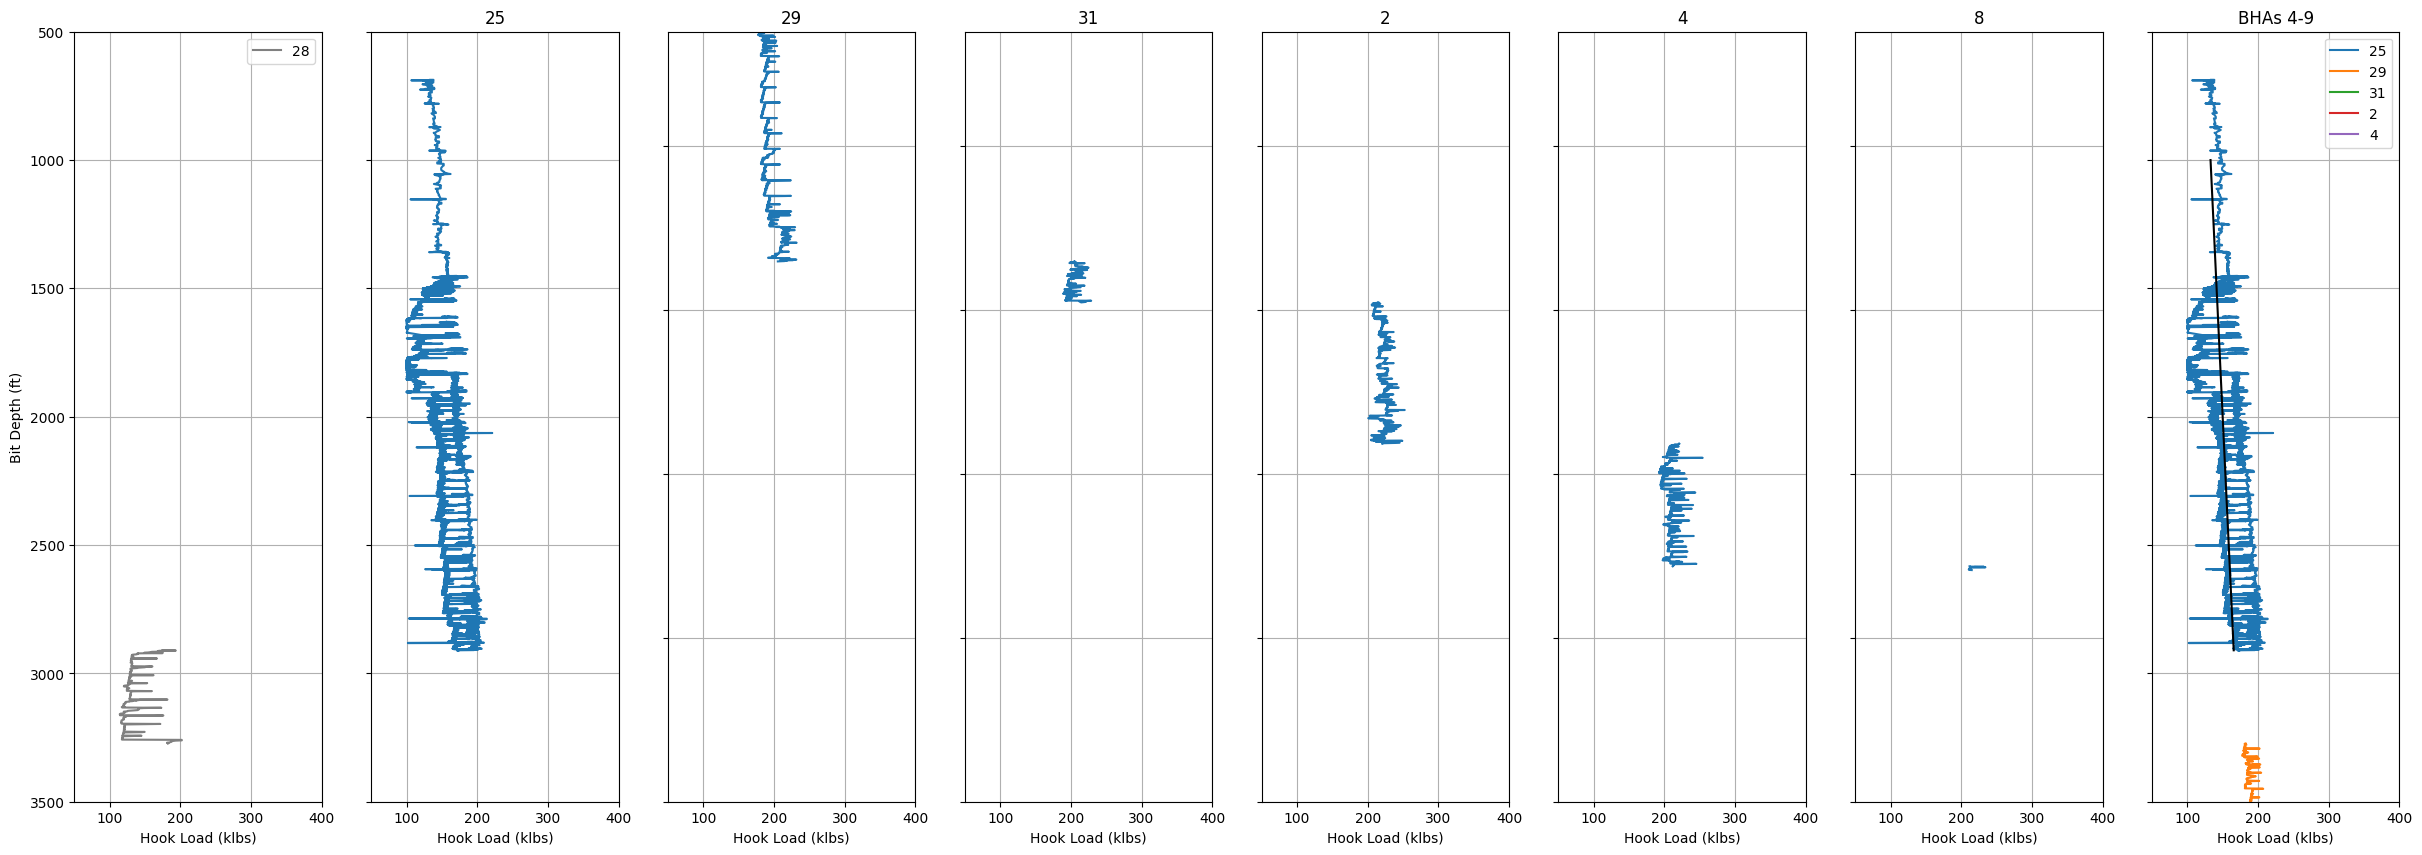

In [23]:
# ylim = [200,6600]
ylim1 = [500,3500]
ylim2 = [3300,8000]
xlim = [50,400]

plt.subplot(181)
plt.plot(df_28_trip['Hook Load (klbs)'],df_28_trip['Bit Depth (feet)'],'grey',label='28')
plt.xlabel('Hook Load (klbs)'), plt.ylabel('Bit Depth (ft)')
plt.xlim(xlim)
plt.ylim(ylim1)
plt.legend(loc='upper right')
plt.gca().invert_yaxis()
plt.grid()

plt.subplot(182)
plt.plot(df_25_trip['Hook Load (klbs)'],df_25_trip['Bit Depth (feet)'])
plt.xlabel('Hook Load (klbs)'), plt.title('25')
plt.gca().set(yticklabels=[])
plt.xlim(xlim)
plt.ylim(ylim1)
plt.gca().invert_yaxis()
plt.grid()

plt.subplot(183)
plt.plot(df_29_trip['Hook Load (klbs)'],df_29_trip['Bit Depth (feet)'])
plt.xlabel('Hook Load (klbs)'), plt.title('29')
plt.gca().set(yticklabels=[])
plt.xlim(xlim)
plt.ylim(ylim2)
plt.gca().invert_yaxis()
plt.grid()

plt.subplot(184)
plt.plot(df_31_trip['Hook Load (klbs)'],df_31_trip['Bit Depth (feet)'])
plt.xlabel('Hook Load (klbs)'), plt.title('31')
plt.gca().set(yticklabels=[])
plt.xlim(xlim)
plt.ylim(ylim2)
plt.gca().invert_yaxis()
plt.grid()

plt.subplot(185)
plt.plot(df_2_trip['Hook Load (klbs)'],df_2_trip['Bit Depth (feet)'])
plt.xlabel('Hook Load (klbs)'), plt.title('2')
plt.gca().set(yticklabels=[])
plt.xlim(xlim)
plt.ylim(ylim2)
plt.gca().invert_yaxis()
plt.grid()

plt.subplot(186)
plt.plot(df_4_trip['Hook Load (klbs)'],df_4_trip['Bit Depth (feet)'])
plt.xlabel('Hook Load (klbs)'), plt.title('4')
plt.gca().set(yticklabels=[])
plt.xlim(xlim)
plt.ylim(ylim2)
plt.gca().invert_yaxis()
plt.grid()

plt.subplot(187)
plt.plot(df_8_trip['Hook Load (klbs)'],df_8_trip['Bit Depth (feet)'])
plt.xlabel('Hook Load (klbs)'), plt.title('8')
plt.gca().set(yticklabels=[])
plt.xlim(xlim)
plt.ylim(ylim2)
plt.gca().invert_yaxis()
plt.grid()

plt.subplot(188)
plt.plot(df_25_trip['Hook Load (klbs)'],df_25_trip['Bit Depth (feet)'],label='25')
plt.plot(df_29_trip['Hook Load (klbs)'],df_29_trip['Bit Depth (feet)'],label='29')
plt.plot(df_31_trip['Hook Load (klbs)'],df_31_trip['Bit Depth (feet)'],label='31')
plt.plot(df_2_trip['Hook Load (klbs)'],df_2_trip['Bit Depth (feet)'],label='2')
plt.plot(df_4_trip['Hook Load (klbs)'],df_4_trip['Bit Depth (feet)'],label='4')
plt.plot(HL_lstsqr,depth_pred,'-k')

plt.xlabel('Hook Load (klbs)'),  plt.title('25-4')
plt.gca().set(yticklabels=[])

plt.xlim(xlim)
plt.ylim(ylim1)
plt.gca().invert_yaxis()
plt.grid()
plt.legend()

# plt.gcf().set_size_inches(20,5)
plt.gcf().set_size_inches(30,10)
plt.show()

## Bin Hook load

In [16]:
df_BHA10_binned = depth_bin(df_BHA10_trip,'Bit Depth (feet)','Hook Load (klbs)',5,25)
df_BHA04_binned = depth_bin(df_BHA4_trip,'Bit Depth (feet)','Hook Load (klbs)',5,25)

# print(df_BHA9_binned.keys())
# print(df_BHA9_binned.describe())

369.67 7118.5 1349.0
7109.67 7114.67
0
0
272.03 4697.57 885.0
4692.03 4697.03
0
0


## Overpull Library Example

## Resistance signal

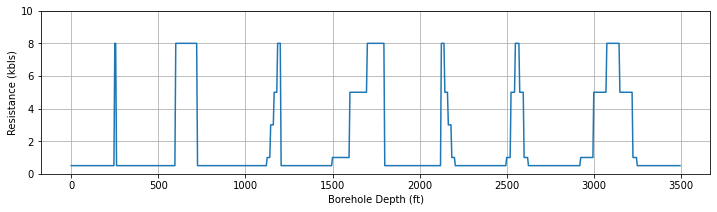

In [17]:
dz = 5
n_inc = 700

depth_profile_syn = np.arange(0,dz*n_inc,dz)
borehole_qual_syn = np.ones_like(depth_profile_syn)*.5
borehole_qual_syn[50:52] = 8

borehole_qual_syn[120:145] = 8

borehole_qual_syn[225:229] = 1
borehole_qual_syn[229:233] = 3
borehole_qual_syn[233:237] = 5
borehole_qual_syn[237:241] = 8

borehole_qual_syn[300:320] = 1
borehole_qual_syn[320:340] = 5
borehole_qual_syn[340:360] = 8

borehole_qual_syn[425:429] = 8
borehole_qual_syn[429:433] = 5
borehole_qual_syn[433:437] = 3
borehole_qual_syn[437:441] = 1

borehole_qual_syn[500:505] = 1
borehole_qual_syn[505:510] = 5
borehole_qual_syn[510:515] = 8
borehole_qual_syn[515:520] = 5
borehole_qual_syn[520:525] = 1

borehole_qual_syn[585:600] = 1
borehole_qual_syn[600:615] = 5
borehole_qual_syn[615:630] = 8
borehole_qual_syn[630:645] = 5
borehole_qual_syn[645:650] = 1

plt.plot(depth_profile_syn,borehole_qual_syn)
plt.ylabel('Resistance (kbls)')
plt.xlabel('Borehole Depth (ft)')
plt.grid(), plt.ylim([0,10])
plt.gcf().set_size_inches(12,3)
plt.show()

### Synthetic BHA

56


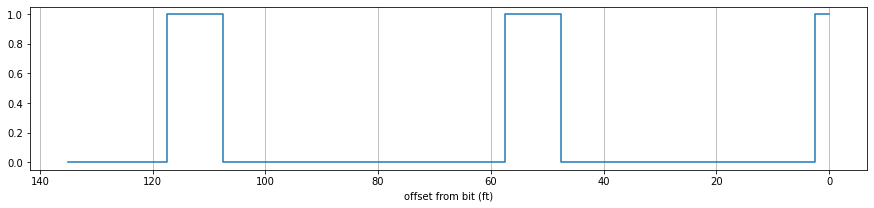

In [18]:
bha_length = 140
x = np.arange(bha_length*2, step=dz)
BHA_stab_flag = np.zeros(int(bha_length*2/dz))
BHA_stab_flag_dirac = BHA_stab_flag.copy()
bit = [0,1]
bit_ind = int(len(BHA_stab_flag)/2 + bit[1]//dz)

# stab1 = [57.69,65.39] # BHA4
stab1 = [62.74-7.8, 62.74] # BHA10
stab1_ind = [int(len(BHA_stab_flag)/2+stab1[0]//dz),int(len(BHA_stab_flag)/2+stab1[1]//dz)]

# stab2 = [113.81,120.8] # BHA4
stab2 = [120.23-8.88, 120.23] # BHA10
print(len(BHA_stab_flag))
stab2_ind = [int(len(BHA_stab_flag)/2+stab2[0]//dz),int(len(BHA_stab_flag)/2+stab2[1]//dz)]

BHA_stab_flag[bit_ind] = 1
BHA_stab_flag[stab1_ind[0]:stab1_ind[1]] = 1
BHA_stab_flag[stab2_ind[0]:stab2_ind[1]] = 1

# dirac bha
BHA_stab_flag_dirac[bit_ind]=1
BHA_stab_flag_dirac[stab1_ind[1]]=1
BHA_stab_flag_dirac[stab2_ind[1]]=1

# wavelet
widths = np.arange(1, 5)
M = 100
s = 4.0
w = 2.0
wavelet = signal.morlet2
# wavelet = signal.ricker

BHA_stab_flag_dirac_wavelet = signal.cwt(BHA_stab_flag_dirac, wavelet, widths,w=0.6)
BHA_flag_trim = BHA_stab_flag[:int(bha_length/dz+1)]

plt.step(x[:int(bha_length/dz)], BHA_stab_flag[int(bha_length/dz):],where='mid')
# plt.plot(x, BHA_stab_flag, 'o', color='grey', alpha=0.3)
# plt.step(x[:int(bha_length/dz)], BHA_stab_flag[int(bha_length/dz):],where='post',label='BHA Impulse')
# plt.step(x, BHA_stab_flag,where='mid')
# plt.step(x[:int(bha_length/dz)], BHA_stab_flag_dirac[int(bha_length/dz):],'--k', where='mid')
# plt.plot(x[:int(bha_length/dz)], BHA_stab_flag_dirac[int(bha_length/dz):], 'o', color='grey', alpha=0.3)
# plt.step(x, BHA_stab_flag_dirac,'--k', where='mid')
# plt.plot(x, BHA_stab_flag_dirac, 'o', color='grey', alpha=0.3)
# plt.plot(x,BHA_stab_flag_dirac_wavelet[0,:], 'r')
plt.gcf().set_size_inches(15,3)
plt.xlabel('offset from bit (ft)')
plt.gca().invert_xaxis()
# plt.xlim(135,145)
plt.grid(axis='x')
plt.show()

### Convolution

In [19]:
syn1 = np.convolve(borehole_qual_syn,BHA_stab_flag,'same')

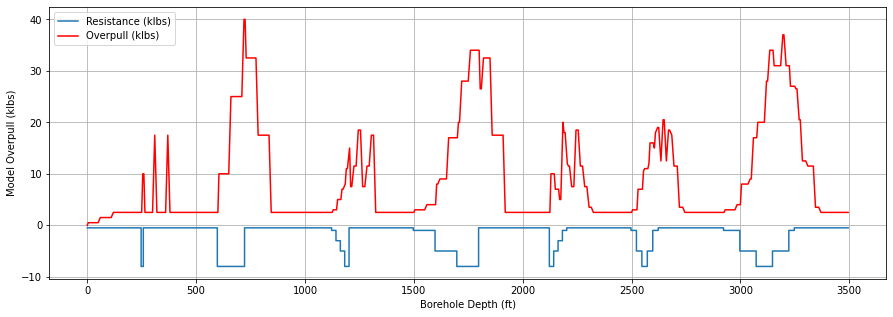

In [20]:

# plt.step(x[:int(bha_length/dz+1)]-bha_length, np.flip(BHA_stab_flag)[:int(bha_length/dz+1)]*4-15,where='post',label='BHA')
plt.step(depth_profile_syn,-borehole_qual_syn,where='mid',label='Resistance (klbs)')
plt.plot(depth_profile_syn,syn1,'r',label='Overpull (klbs)')
plt.ylabel('Model Overpull (klbs)')
plt.xlabel('Borehole Depth (ft)')
plt.legend(), plt.grid()

plt.gcf().set_size_inches(15,5)

plt.show()

# Match real data

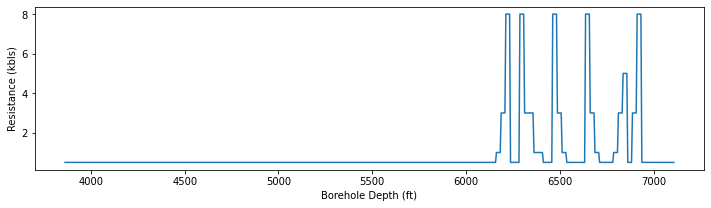

In [21]:
dz = 5
n_inc = 650

depth_profile_syn = np.arange(0,dz*n_inc,dz)+df_BHA10_binned['bin_center'].max()-n_inc*dz
borehole_qual_syn = np.ones_like(depth_profile_syn)*.5

borehole_qual_syn[460:465] = 1
borehole_qual_syn[465:470] = 3
borehole_qual_syn[470:475] = 8

borehole_qual_syn[485:490] = 8
borehole_qual_syn[490:500] = 3
borehole_qual_syn[500:510] = 1

borehole_qual_syn[520:525] = 8
borehole_qual_syn[525:530] = 3
borehole_qual_syn[530:535] = 1

borehole_qual_syn[555:560] = 8
borehole_qual_syn[560:565] = 3
borehole_qual_syn[565:570] = 1

borehole_qual_syn[585:590] = 1
borehole_qual_syn[590:595] = 3
borehole_qual_syn[595:600] = 5

# borehole_qual_syn[600:605] = 1
borehole_qual_syn[605:610] = 3
borehole_qual_syn[610:615] = 8

plt.plot(depth_profile_syn,borehole_qual_syn)
plt.ylabel('Resistance (kbls)')
plt.xlabel('Borehole Depth (ft)')

plt.gcf().set_size_inches(12,3)
plt.show()

## Convolution

In [22]:
synM = np.convolve(borehole_qual_syn,BHA_stab_flag,'same')

6832.17


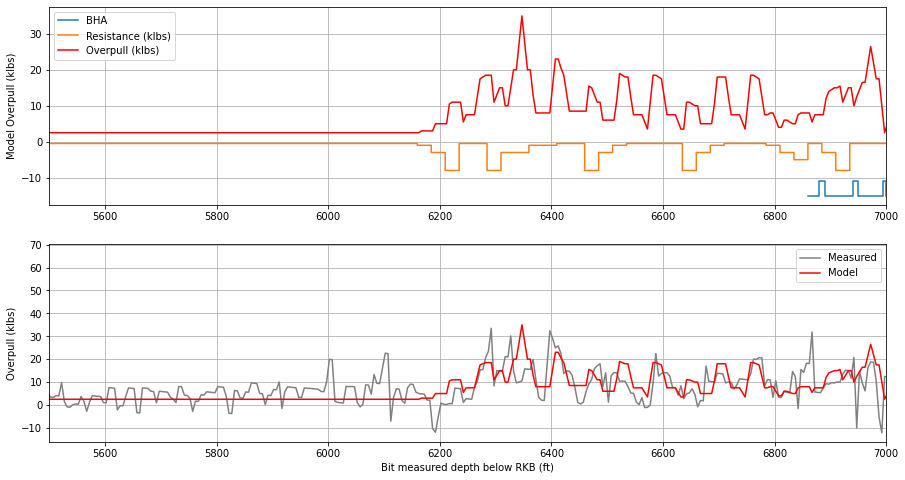

In [23]:
xlim=[5500,7000]
print(np.min(x[:int(bha_length/dz+1)]+df_BHA10_binned['bin_center'].max()-2*bha_length))
plt.subplot(211)
noise = np.random.normal(size=len(synM),scale=np.mean(synM)*.5)
# plt.step(x[int(len(BHA_stab_flag)/2):], -np.flip(BHA_stab_flag[int(len(BHA_stab_flag)/2):])*4-15,where='mid')
plt.step(x[:int(bha_length/dz+1)]+xlim[1]-bha_length, np.flip(BHA_stab_flag)[:int(bha_length/dz+1)]*4-15,where='post',label='BHA')
plt.step(depth_profile_syn,-borehole_qual_syn,where='mid',label='Resistance (klbs)')
plt.plot(depth_profile_syn,synM,'r',label='Overpull (klbs)')
# plt.plot(depth_profile_syn,syn2)
# plt.plot(depth_profile_syn,syn3)
plt.xlim([np.min(depth_profile_syn),np.max(depth_profile_syn)])
plt.ylabel('Model Overpull (klbs)')
plt.legend(), plt.grid()
plt.xlim(xlim)

plt.subplot(212)
plt.plot(df_BHA10_binned['bin_center'],df_BHA10_binned['Hook Load (klbs)bin_max']-np.polyval(HL_fit, df_BHA10_binned['bin_center']),'gray',label='Measured')
plt.plot(depth_profile_syn,synM,'r',label='Model')
# plt.plot(df_BHA10_trip['Bit Depth (feet)'],df_BHA10_trip['Block Height (feet)']/10,'k')
plt.xlim([df_BHA10_binned['bin_center'].max()-n_inc*dz,df_BHA10_binned['bin_center'].max()])
plt.xlabel('Bit measured depth below RKB (ft)')
plt.ylabel('Overpull (klbs)')
plt.xlim(xlim)
plt.legend()
# plt.ylim([0,200])
plt.gcf().set_size_inches(15,8)
plt.grid()
plt.show()